In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data:

In [2]:
lkml_technical_df = pd.read_csv("./lkml_technical.csv")
lkml_non_technical_df = pd.read_csv("./lkml_non_technical.csv")
gh_technical_df = pd.read_csv("./gh_technical.csv")
gh_non_technical_df = pd.read_csv("./gh_non_technical.csv")

In [3]:
print("Number of instances in the LKML technical dataset:", lkml_technical_df.shape[0])
print("Number of instances in the LKML non-technical dataset:", lkml_non_technical_df.shape[0])
print("Number of instances in the GitHub technical dataset:", gh_technical_df.shape[0])
print("Number of instances in the GitHub non-technical dataset:", gh_non_technical_df.shape[0])

Number of instances in the LKML technical dataset: 1327
Number of instances in the LKML non-technical dataset: 168
Number of instances in the GitHub technical dataset: 4398
Number of instances in the GitHub non-technical dataset: 704


*WARNING: Number of instances have important differences compared to [Ferreira et al., 2024].*

In [4]:
lkml_technical_df.sample(5)

,Unnamed: 0,thread_id,email_id,ahlaam_preprocessed_text,original_text,email_classification,author_name,author_email,author_role,is_first_author_thread,nr_characters,ratio_words_email_thread,position_comment_thread,is_last_comment,time_start_to_email,time_email_to_end,time_previous_to_email,time_email_to_next
615,615,391895,398943,"I guess, it would be possible to flatten the t...","On 09/14/2018 06:25 PM, Jan H. Schönherr wrote...",technical,Jan H. Schönherr,jschoenh@amazon.de,0,1,644,0.174451,0.640351,0,0.080460,0.919540,0.0,0.022989
66,66,166459,168206,The above totally does not parse (no pun inten...,"On Mon, 15 Jan 2018 19:41:12 +0800 changbin.du...",technical,Steven Rostedt,rostedt@goodmis.org,1,0,426,1.000000,0.833333,0,0.000000,0.000000,0.0,0.000000
273,273,245912,245951,"Just a drive-by nit:FWIW, <linux/bitfield.h> a...","Just a drive-by nit: On 10/04/18 19:32, Jae H...",technical,Robin Murphy,robin.murphy@arm.com,1,0,180,0.054945,0.666667,0,0.461538,0.538462,0.0,0.000000
206,206,222860,230503,is it useful to print this each time ? or is i...,"Hi yannick On 03/02/2018 04:44 PM, yannick fe...",technical,Patrice CHOTARD,patrice.chotard@st.com,0,0,108,1.000000,0.950000,0,1.000000,0.000000,0.0,0.000000
456,456,326460,326573,I'll send a v1 yet today. The RFC version was ...,"On Thu, Jun 28, 2018 at 10:38:24AM +0100, Sude...",technical,Andrew Jones,drjones@redhat.com,0,0,791,1.000000,0.250000,0,0.000000,0.928571,0.0,0.000000


In [5]:
lkml_non_technical_df.sample(5)

,Unnamed: 0,thread_id,email_id,ahlaam_preprocessed_text,original_text,email_classification,author_name,author_email,author_role,is_first_author_thread,nr_characters,ratio_words_email_thread,position_comment_thread,is_last_comment,time_start_to_email,time_email_to_end,time_previous_to_email,time_email_to_next
106,106,261377,261389,"This doesn't have to be on separate lines, as ...","On Mon, Apr 16, 2018 at 10:08:19PM +0500, Ahsa...",not_technical,Guenter Roeck,linux@roeck-us.net,1,0,266,1.000000,0.500000,0,0.0,0.0,0.000000,0.0
93,93,210458,210463,"Wait, clang does not have that? That's crazy,...","On Wed, Mar 28, 2018 at 11:14:56AM -0700, Matt...",not_technical,Greg Kroah-Hartman,gregkh@linuxfoundation.org,1,0,102,0.212389,0.800000,0,0.0,0.0,0.000000,0.0
117,117,307410,349339,I took a closer look at this and it's not nece...,"On 15/06/18 01:51 PM, Serge Semin wrote: I t...",not_technical,Logan Gunthorpe,logang@deltatee.com,1,1,339,0.334764,1.000000,1,1.0,0.0,0.829268,0.0
12,12,207400,208159,Thanks for the review! oops - left that in by ...,"On Tue, Feb 27, 2018 at 6:05 PM, Guenter Roeck...",not_technical,Tim Harvey,tharvey@gateworks.com,1,1,615,1.000000,0.941176,0,0.0,0.0,0.000000,0.0
138,138,402510,413768,"Sure, but you also used the word ""pile"" and I ...","On 28/09/2018 15:02, Thomas Gleixner wrote: ...",not_technical,Tvrtko Ursulin,tvrtko.ursulin@linux.intel.com,1,0,1799,1.000000,0.315789,0,0.6,0.4,0.000000,0.0


In [6]:
gh_technical_df.sample(5)

,Unnamed: 0,issue_id,comment_id,ahlaam_preprocessed_text,original_text,email_classification,author_name,is_first_author_thread,nr_characters,ratio_words_email_thread,position_comment_thread,is_last_comment,time_start_to_email,time_email_to_end,time_previous_to_email,time_email_to_next
3971,3971,10462,575738220,we just picked this up and started working on ...,@ortelli-oxalide we just picked this up and st...,technical,Daniel Dreier,0,1091,0.588556,0.007299,0,0.901342,0.098658,0.099448,0.902131
4318,4318,24031,797845338,You are welcome. Is there any particular reaso...,@jmarolf You are welcome. > In the sections ...,technical,Igor Levicki,0,1378,0.548134,0.016129,0,0.990394,0.009606,0.010567,0.951969
928,928,3058,619864254,"Given that ""Ctrl+C"" is now default copy keybin...","Given that ""Ctrl+C"" is now default copy keybin...",technical,Vadim Kantorov,0,278,0.164038,0.029412,0,0.575843,0.421348,0.424157,0.578652
3466,3466,3469,483858507,The impression I'm getting is that closing a t...,The impression I'm getting is that closing a t...,technical,Rich Chiodo,0,90,0.148760,0.034483,0,0.000000,1.000000,1.001570,0.001570
1264,1264,1381,523685268,I am whole-heartedly behind this experiment. I...,I am whole-heartedly behind this experiment. I...,technical,mix irving,0,272,0.095703,0.005714,0,0.066667,0.866667,0.933333,0.133333


In [7]:
gh_non_technical_df.sample(5)

,Unnamed: 0,issue_id,comment_id,ahlaam_preprocessed_text,original_text,email_classification,author_name,is_first_author_thread,nr_characters,ratio_words_email_thread,position_comment_thread,is_last_comment,time_start_to_email,time_email_to_end,time_previous_to_email,time_email_to_next
228,228,11609,351081596,I see lots of excitement about JSX here but no...,@birkir I see lots of excitement about JSX her...,not_technical,Günter Zöchbauer,0,842,0.108550,0.004184,0,0.339031,0.658120,0.660969,0.339031
151,151,26489,703174497,I agree with everything you said this is a pr...,> > > I get it that the creators need money so...,not_technical,NaN,0,320,0.333333,0.021739,0,1.000000,0.000000,0.500000,1.500000
449,449,37771,650190816,"seems like that's problem in USA only, we're r...","@thecp seems like that's problem in USA only, ...",not_technical,Yuriy Yakovenko,0,207,0.129730,0.076923,0,0.000000,0.000000,0.000000,0.000000
542,542,24031,784574163,Then just concentrate on the **original proble...,"> As you may have noticed, this is actually a ...",not_technical,NaN,0,727,0.273050,0.016129,0,0.974063,0.025937,0.026897,0.935639
336,336,87348,567472234,It's funny and sad at the same time that one s...,It's funny and sad at the same time that one s...,not_technical,NaN,0,126,0.818182,0.050000,0,0.000000,0.000000,0.000000,0.000000


In [8]:
lkml_technical_df.rename(columns={"email_id": "id", "ahlaam_preprocessed_text": "text", "email_classification": "label"}, inplace=True)
lkml_non_technical_df.rename(columns={"email_id": "id", "ahlaam_preprocessed_text": "text", "email_classification": "label"}, inplace=True)
gh_technical_df.rename(columns={"comment_id": "id", "ahlaam_preprocessed_text": "text", "email_classification": "label"}, inplace=True)
gh_non_technical_df.rename(columns={"comment_id": "id", "ahlaam_preprocessed_text": "text", "email_classification": "label"}, inplace=True)

In [9]:
matcher = {"technical": 0, "not_technical": 1}
lkml_technical_df["label"] = lkml_technical_df["label"].replace(matcher).astype(int)
lkml_non_technical_df["label"] = lkml_non_technical_df["label"].replace(matcher).astype(int)
gh_technical_df["label"] = gh_technical_df["label"].replace(matcher).astype(int)
gh_non_technical_df["label"] = gh_non_technical_df["label"].replace(matcher).astype(int)

C:\Users\Fabian Pena\AppData\Local\Temp\ipykernel_26616\2743097890.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lkml_technical_df["label"] = lkml_technical_df["label"].replace(matcher).astype(int)
C:\Users\Fabian Pena\AppData\Local\Temp\ipykernel_26616\2743097890.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lkml_non_technical_df["label"] = lkml_non_technical_df["label"].replace(matcher).astype(int)
C:\Users\Fabian Pena\AppData\Local\Temp\ipykernel_26616\2743097890.py:4: FutureWarning: Downcasting behavior in `replace

### Clean the data:

In [10]:
print("Number of missing texts in the LKML technical dataset:", lkml_technical_df["text"].isnull().sum())
print("Number of missing texts in the LKML non-technical dataset:", lkml_non_technical_df["text"].isnull().sum())
print("Number of missing texts in the GitHub technical dataset:", gh_technical_df["text"].isnull().sum())
print("Number of missing texts in the GitHub non-technical dataset:", gh_non_technical_df["text"].isnull().sum())

Number of missing texts in the LKML technical dataset: 0
Number of missing texts in the LKML non-technical dataset: 0
Number of missing texts in the GitHub technical dataset: 0
Number of missing texts in the GitHub non-technical dataset: 0


In [11]:
print("Number of missing labels in the LKML technical dataset:", lkml_technical_df["label"].isnull().sum())
print("Number of missing labels in the LKML non-technical dataset:", lkml_non_technical_df["label"].isnull().sum())
print("Number of missing labels in the GitHub technical dataset:", gh_technical_df["label"].isnull().sum())
print("Number of missing labels in the GitHub non-technical dataset:", gh_non_technical_df["label"].isnull().sum())

Number of missing labels in the LKML technical dataset: 0
Number of missing labels in the LKML non-technical dataset: 0
Number of missing labels in the GitHub technical dataset: 0
Number of missing labels in the GitHub non-technical dataset: 0


In [12]:
print(f"Number of duplicated texts in the LKML technical dataset: {lkml_technical_df["text"].duplicated().sum()} ({lkml_technical_df["text"].duplicated().sum()/lkml_technical_df.shape[0]:.2%})")
print(f"Number of duplicated texts in the LKML non-technical dataset: {lkml_non_technical_df["text"].duplicated().sum()} ({lkml_non_technical_df["text"].duplicated().sum()/lkml_non_technical_df.shape[0]:.2%})")
print(f"Number of duplicated texts in the GitHub technical dataset: {gh_technical_df["text"].duplicated().sum()} ({gh_technical_df["text"].duplicated().sum()/gh_technical_df.shape[0]:.2%})")
print(f"Number of duplicated texts in the GitHub non-technical dataset: {gh_non_technical_df["text"].duplicated().sum()} ({gh_non_technical_df["text"].duplicated().sum()/gh_non_technical_df.shape[0]:.2%})")

Number of duplicated texts in the LKML technical dataset: 29 (2.19%)
Number of duplicated texts in the LKML non-technical dataset: 1 (0.60%)
Number of duplicated texts in the GitHub technical dataset: 130 (2.96%)
Number of duplicated texts in the GitHub non-technical dataset: 16 (2.27%)


### Analyze distributions:

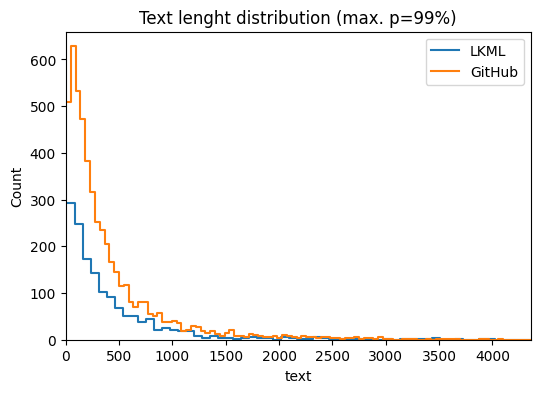

In [13]:
plt.figure(figsize=(6, 4))
sns.histplot(pd.concat([lkml_technical_df, lkml_non_technical_df])["text"].str.len(), element="step", fill=False)
sns.histplot(pd.concat([gh_technical_df, gh_non_technical_df])["text"].str.len(), element="step", fill=False)
plt.xlim([
    0,
    pd.concat([
        lkml_technical_df["text"].str.len(),
        lkml_non_technical_df["text"].str.len(),
        gh_technical_df["text"].str.len(),
        gh_non_technical_df["text"].str.len(),
    ], axis=1, ignore_index=True).quantile(.99).max()
])
plt.legend(labels=["LKML", "GitHub"])
plt.title("Text lenght distribution (max. p=99%)")
plt.show()

In [14]:
label_stats = pd.concat([
    pd.concat([lkml_technical_df, lkml_non_technical_df])["label"].value_counts(dropna=False, normalize=True),
    pd.concat([gh_technical_df, gh_non_technical_df])["label"].value_counts(dropna=False, normalize=True),
    pd.concat([lkml_technical_df, lkml_non_technical_df, gh_technical_df, gh_non_technical_df])["label"].value_counts(dropna=False, normalize=True)
], axis=1)
label_stats.columns = ["LKML", "GitHub", "all"]
label_stats.round(2)

,LKML,GitHub,all
label,,,
0,0.89,0.86,0.87
1,0.11,0.14,0.13


### Persist datasets:

In [15]:
df = pd.concat([lkml_technical_df, lkml_non_technical_df, gh_technical_df, gh_non_technical_df], ignore_index=True)

In [16]:
print(f"Number of duplicated texts in the entire dataset: {df["text"].duplicated().sum()} ({df["text"].duplicated().sum()/df.shape[0]:.2%})")

Number of duplicated texts in the entire dataset: 176 (2.67%)


In [17]:
df[["id", "text", "label"]].to_parquet("./tone_bearing.parquet", index=False)

In [18]:
print("Number of instances in the persisted dataset:", df.shape[0])

Number of instances in the persisted dataset: 6597
